## Analysis of professor ratings

In [175]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pyprojroot import here

df = pd.read_csv(here("pandas/data/evals-mod.csv"))

(array([ 1.,  1.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  3.,  0.,  2.,  5.,
         0.,  6.,  0.,  4.,  0., 11.,  0., 11.,  0., 17.,  0., 20., 19.,
         0., 19.,  0., 26.,  0., 24.,  0., 28.,  0., 22.,  0., 26., 43.,
         0., 41.,  0., 34.,  0., 25.,  0., 35.,  0., 25., 11.]),
 array([2.3  , 2.354, 2.408, 2.462, 2.516, 2.57 , 2.624, 2.678, 2.732,
        2.786, 2.84 , 2.894, 2.948, 3.002, 3.056, 3.11 , 3.164, 3.218,
        3.272, 3.326, 3.38 , 3.434, 3.488, 3.542, 3.596, 3.65 , 3.704,
        3.758, 3.812, 3.866, 3.92 , 3.974, 4.028, 4.082, 4.136, 4.19 ,
        4.244, 4.298, 4.352, 4.406, 4.46 , 4.514, 4.568, 4.622, 4.676,
        4.73 , 4.784, 4.838, 4.892, 4.946, 5.   ]),
 <BarContainer object of 50 artists>)

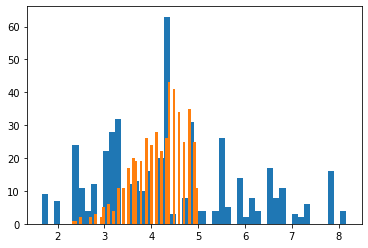

In [176]:

# get row wise average
df['bty_avg'] = df.loc[:, 'bty_f1lower':'bty_m2upper'].mean(axis=1)

plt.hist(df['bty_avg'], bins=50)
plt.hist(df['score'], bins=50)

# print(plot)

# jupyter notebook

In [177]:
X = df['bty_avg']
X = sm.add_constant(X) 
y = df['score']


In [178]:
model = sm.OLS(y, X)
results = model.fit()

In [179]:
print(results.summary())
results.params

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           5.08e-05
Time:                        08:14:27   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8803      0.076     50.961      0.0

const      3.880333
bty_avg    0.066637
dtype: float64

In [180]:
x1 = df['bty_avg']
b0 = results.params[0] 
b1 = results.params[1]


Text(7.1, 4.25, 'Slope: 0.067')

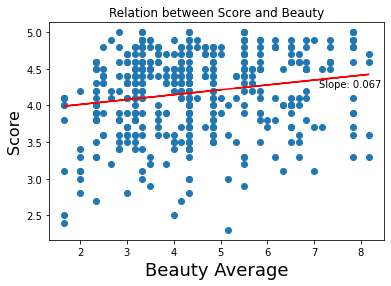

In [181]:
plot = plt.scatter(x=df['bty_avg'] , y= df['score'])
plt.plot(df['bty_avg'], b0 + b1*x1, "r")
plt.title("Relation between Score and Beauty")
plt.xlabel('Beauty Average', fontsize=18)
plt.ylabel('Score', fontsize=16)
plt.text(7.1, 4.25, "Slope: 0.067")

## This model has an $R^2 = 0.035$

In [182]:
round(results.rsquared, 5)

0.03502

## OLS with Categroical Predictor

In [183]:
X = pd.get_dummies(df['gender'], drop_first=True)
X = sm.add_constant(X) 
model = sm.OLS(y, X)
m_gen = model.fit()

In [184]:
print(m_gen.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     7.753
Date:                Fri, 19 Mar 2021   Prob (F-statistic):            0.00558
Time:                        08:14:38   Log-Likelihood:                -370.61
No. Observations:                 463   AIC:                             745.2
Df Residuals:                     461   BIC:                             753.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0928      0.039    105.852      0.0

In [186]:
X = pd.get_dummies(df['rank'])
del X['teaching'] # reference category
X = sm.add_constant(X)
model = sm.OLS(y, X)
m_rank = model.fit()

In [187]:
m_rank.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.706
Date:                Fri, 19 Mar 2021   Prob (F-statistic):             0.0679
Time:                        08:14:43   Log-Likelihood:                -371.77
No. Observations:                 463   AIC:                             749.5
Df Residuals:                     460   BIC:                             761.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2843      0.054     79.853      0.000       4.179       4.390
tenure track    -0.1297      0.075     -1.733      0.084      -0.277       0.017
tenured         -0.1452      0.064     -2.284      0.023      -0.270      -0.020
==============================================================================
Omnibus:                       31.248   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.425
Skew:                          -0.687   Prob(JB):                     1.23e-08
Kurtosis:                       2.968   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
X = pd.get_dummies(df['rank'])
del X['tenure track'] # reference category
X = sm.add_constant(X)
model = sm.OLS(y, X)
m_rank = model.fit()
m_rank.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.706
Date:                Fri, 19 Mar 2021   Prob (F-statistic):             0.0679
Time:                        08:14:45   Log-Likelihood:                -371.77
No. Observations:                 463   AIC:                             749.5
Df Residuals:                     460   BIC:                             761.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1546      0.052     79.680      0.000       4.052       4.257
teaching       0.1297      0.075      1.733      0.084      -0.017       0.277
tenured       -0.0155      0.062     -0.249      0.804      -0.138       0.107
==============================================================================
Omnibus:                       31.248   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.425
Skew:                          -0.687   Prob(JB):                     1.23e-08
Kurtosis:                       2.968   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This tells us that newer professors score higher on average than tunured professors

In [214]:
X = pd.get_dummies(df['rank'])
X['tenure_eligible']  = X['tenure track'] + X['tenured']
X = X['tenure_eligible']

X = sm.add_constant(X)
model = sm.OLS(y, X)
m_rank = model.fit()
m_rank.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.361
Date:                Fri, 19 Mar 2021   Prob (F-statistic):             0.0210
Time:                        08:19:38   Log-Likelihood:                -371.80
No. Observations:                 463   AIC:                             747.6
Df Residuals:                     461   BIC:                             755.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.2843      0.054     79.934      0.000       4.179       4.390
tenure_eligible    -0.1405      0.061     -2.315      0.021      -0.260      -0.021
==============================================================================
Omnibus:                       31.198   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.360
Skew:                          -0.686   Prob(JB):                     1.27e-08
Kurtosis:                       2.966   Cond. No.                         4.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
m_rank.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.361
Date:                Fri, 19 Mar 2021   Prob (F-statistic):             0.0210
Time:                        08:21:16   Log-Likelihood:                -371.80
No. Observations:                 463   AIC:                             747.6
Df Residuals:                     461   BIC:                             755.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.2843      0.054     79.934      0.000       4.179       4.390
tenure_eligible    -0.1405      0.061     -2.315      0.021      -0.260      -0.021
==============================================================================
Omnibus:                       31.198   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.360
Skew:                          -0.686   Prob(JB):                     1.27e-08
Kurtosis:                       2.966   Cond. No.                         4.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
round(results.rsquared, 5)

0.03502